<a href="https://colab.research.google.com/github/Ximenaloranca/Ecuaciones-Diferenciales-Parciales-/blob/main/Ecuacion%20de%20calor.%20Metodo%20de%20Crank-Nicolson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ecuacion de calor. Metodo implicito de Crank-Nicolson**
En este programa vamos a resolver un problema de la ecuacion de calor por el metodo de Crank-Nicolson.

**El problema a resolver es:**

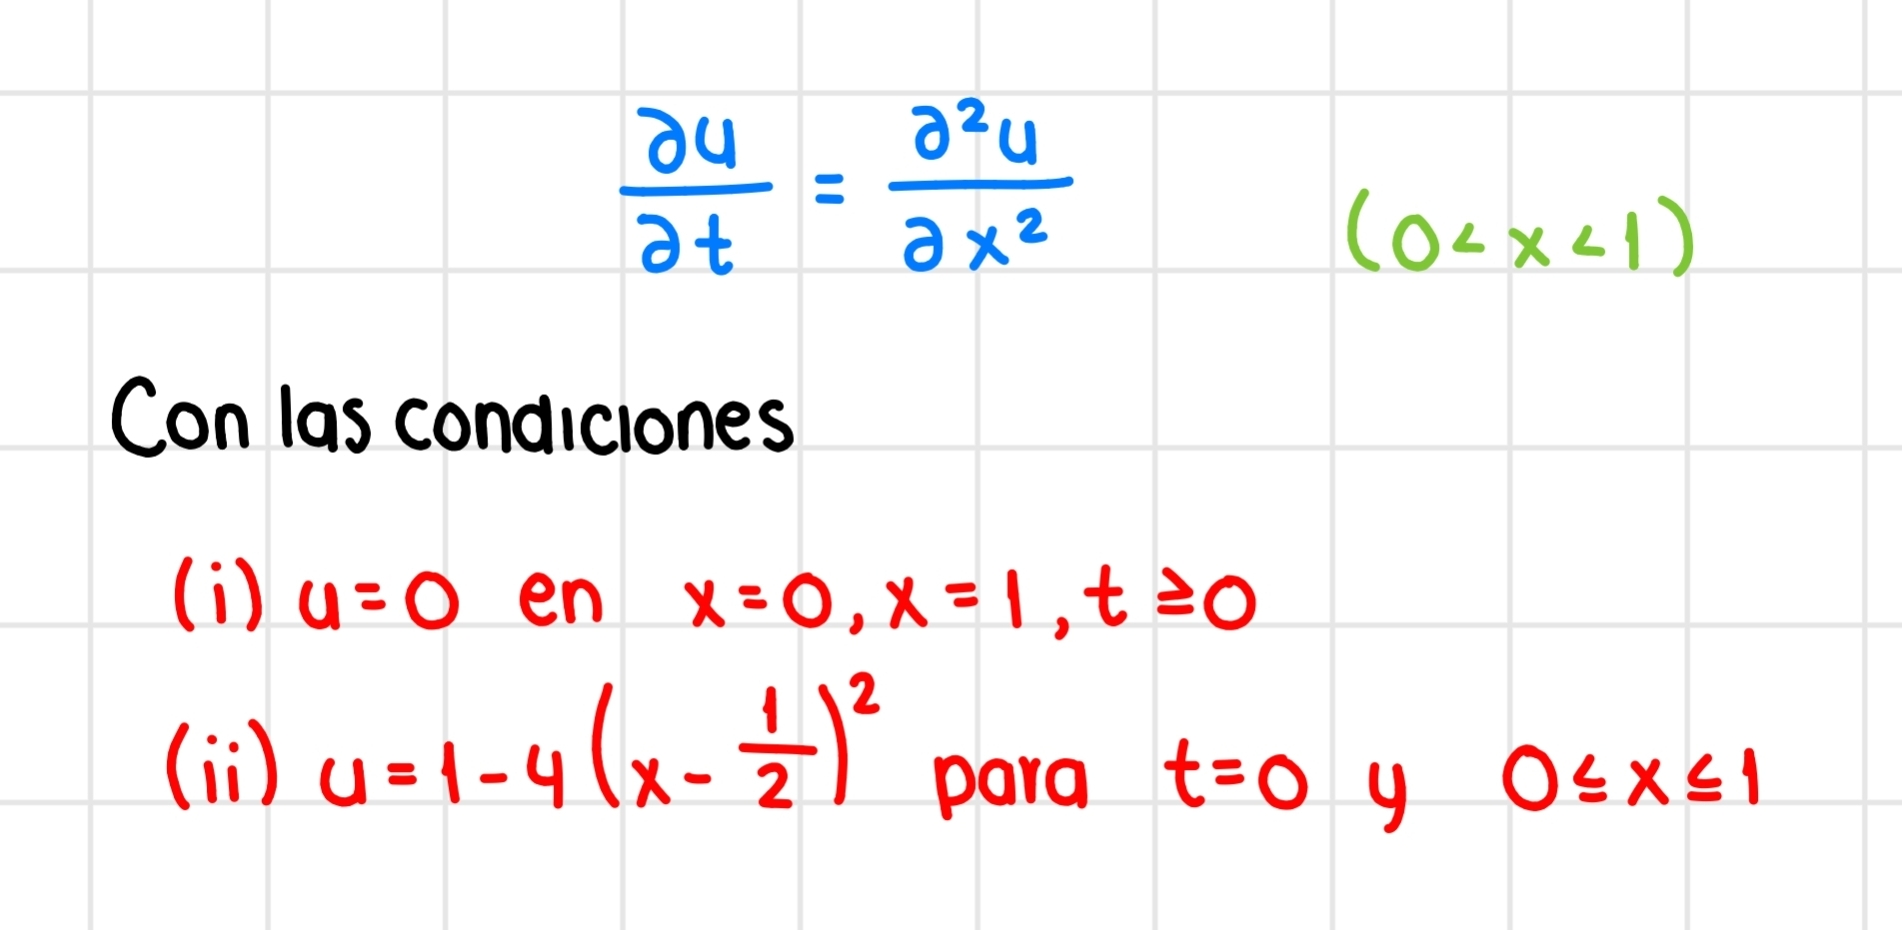

El método de Crank-Nicolson es un esquema de diferencias finitas implícito a diferencia del método de Richardson que vimos en el codigo anterior (tambien lo vimos con un ejemplo) que usa solo el tiempo futuro para la derivada en el espacio, Crank-Nicolson promedia el tiempo presente y el futuro.


Podemos decir que este metodo es mas preciso porque toma el promedio del tiempo en el presente y en el futuro, no solo uno.

$$\frac{u_{i,j+1} - u_{i,j}}{k} = \frac{1}{2} \left( \frac{u_{i+1,j+1} - 2u_{i,j+1} + u_{i-1,j+1}}{h^2} + \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h^2} \right)$$


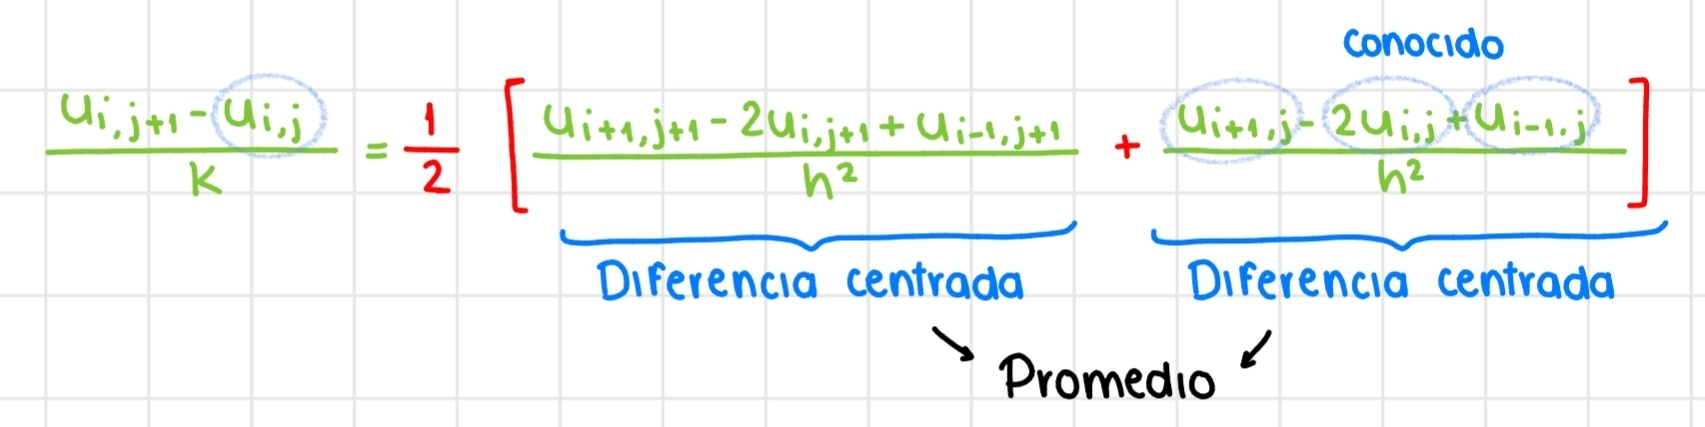

Despejando todos los valores que conocemos, tenemos:

$${-r u_{i-1, j+1} + (2 + 2r) u_{i, j+1} - r u_{i+1, j+1}} = {r u_{i-1, j} + (2 - 2r) u_{i, j} + r u_{i+1, j}}$$

Aqui podemos ver que del lado izquierdo de la igualdad tenemos a la matriz A (es la del futuro) y del lado derecho tenemos la matriz B (es la del presente).

Tambien recordamos que las matrices son tridiagonales.

**Primero vamos a ver el codigo que hicimos en la clase**

In [1]:
# Aqui importamos todas las librerias que vamos a utilizar
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from tabulate import tabulate

In [2]:
#Se define la funcion de la condicion inicial
def f(x):
  return 1-4*(x-0.5)**2

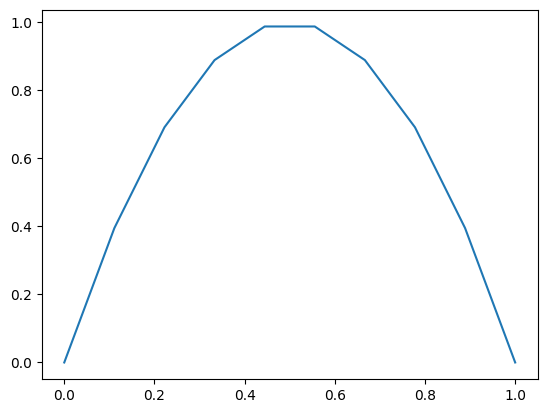

In [3]:
#Graficamos la condicion inicial del ejercicio
x=np.linspace(0,1,10)
plt.plot(x,f(x))

In [4]:
def tridiagonal(n, a, b): #Construimos las matrices de manera automatica para no escribirla entrada por entrada
  return sp.Matrix([
      [a if i == j else b if abs (i-j) == 1 else 0 for j in range (n)]
      for i in range(n)
  ])

In [5]:
r=1

In [6]:
A = tridiagonal (9, 2 + 2*r, -r) #Definimos la matriz tridiagonal A

In [7]:
A #Imprimimos la matriz A

Matrix([
[ 4, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  4, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  4, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  4, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  4, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  4, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  4, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  4, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  4]])

In [8]:
B = tridiagonal (9, 2 - 2*r, r) #Definimos la matriz tridiagonal B

In [9]:
B #Imprimimos la matriz B

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [10]:
b = sp.Matrix([f(0.1*(i+1)) for i in range (9)])

In [11]:
b

Matrix([
[0.36],
[0.64],
[0.84],
[0.96],
[ 1.0],
[0.96],
[0.84],
[0.64],
[0.36]])

In [12]:
def crank_nicolson(A,B,b,j):
  b_1 = B*b
  S = []

  for i in range(j):
    sol = A.LUsolve(b_1)
    S.append(sol.T)
    b_1 = B*sol

  return sp.Matrix(S)

In [13]:
j = 50

In [14]:
U = crank_nicolson(A,B,b,j)

In [15]:
data = [list(U.row(i)) for i in range(5)]

print(tabulate(data, tablefmt="grid"))

+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.301436 | 0.565746 | 0.761547 | 0.880442 | 0.920221 | 0.880442 | 0.761547 | 0.565746 | 0.301436 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.26763  | 0.504776 | 0.688489 | 0.802994 | 0.841718 | 0.802994 | 0.688489 | 0.504776 | 0.26763  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.23989  | 0.454784 | 0.623126 | 0.729952 | 0.766473 | 0.729952 | 0.623126 | 0.454784 | 0.23989  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.21645  | 0.411015 | 0.564592 | 0.662619 | 0.696285 | 0.662619 | 0.564592 | 0.411015 | 0.21645  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.195788 | 0.372138 | 0.511722 | 0.601117 | 0.631868 | 0.601117 | 0.511722 | 0.372138 | 0

In [16]:
U_np = np.array(U.tolist(), dtype =float)

In [17]:
x = np.linspace(0,1,9)
y = np.linspace (0,0.5,j)
X, Y = np.meshgrid(x,y)

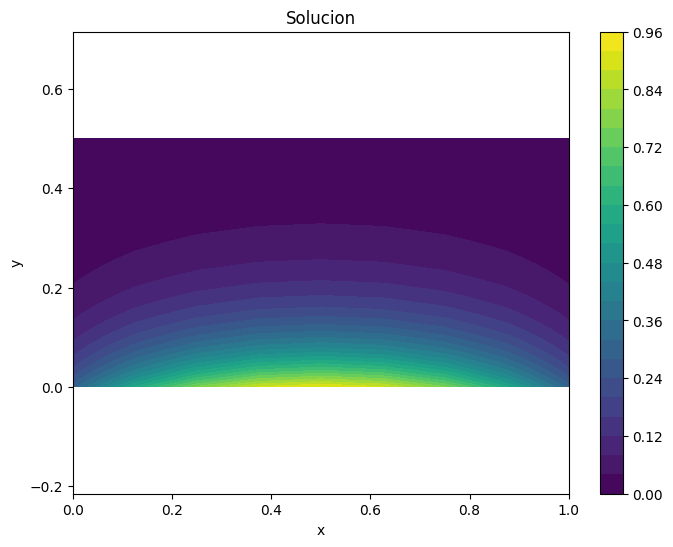

In [18]:
plt.figure(figsize=(8,6))
contour = plt.contourf(X,Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solucion')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

In [19]:
# Configuración para gráficos
%matplotlib inline

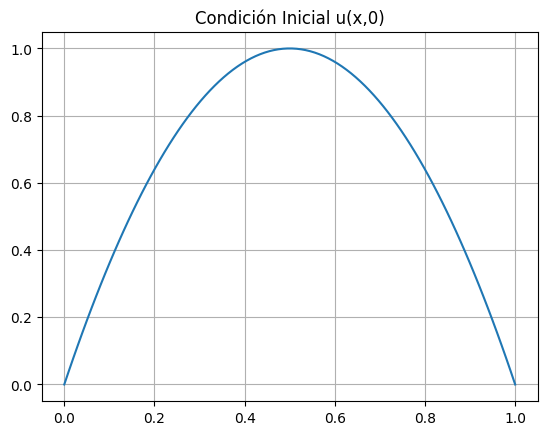

In [20]:
# Celda 2: Definición de la función de condición inicial
def f(x):
    # La ecuación es u = 1 - 4(x - 1/2)^2
    return 1 - 4 * (x - 0.5)**2

# Visualización rápida de la condición inicial
x_plot = np.linspace(0, 1, 100)
plt.plot(x_plot, f(x_plot))
plt.title("Condición Inicial u(x,0)")
plt.grid(True)
plt.show()

In [21]:
# Celda 3: Definición de parámetros y Matrices
# Parámetros del problema
h = 0.1        # Paso en x (dado por el problema)
k = 0.01       # Paso en t (deducido de la Tabla 2.6: 0.00, 0.01, ...)
r = 1
#r = k / h**2   # Factor r = 0.01 / 0.01 = 1

# Nodos internos (sin contar 0 y 1 donde u=0)
# Para h=0.1, tenemos nodos en 0.1, 0.2, ..., 0.9 (9 incógnitas)
n_nodos = 9

# Función para crear matrices tridiagonales (basado en Untitled21)
def tridiagonal(n, diag_val, off_diag_val):
    return sp.Matrix([
        [diag_val if i == j else off_diag_val if abs(i-j) == 1 else 0 for j in range(n)]
        for i in range(n)
    ])

# Construcción de matrices para Crank-Nicolson
# Lado Izquierdo (j+1): Diagonal = 2 + 2r, Fuera = -r
A = tridiagonal(n_nodos, 2 + 2*r, -r)

# Lado Derecho (j): Diagonal = 2 - 2r, Fuera = r
B = tridiagonal(n_nodos, 2 - 2*r, r)

print(f"Valor de r: {r}")
print("Matriz A (Lado Izquierdo):")
sp.pprint(A)
print("\nMatriz B (Lado Derecho):")
sp.pprint(B)

Valor de r: 1
Matriz A (Lado Izquierdo):
⎡4   -1  0   0   0   0   0   0   0 ⎤
⎢                                  ⎥
⎢-1  4   -1  0   0   0   0   0   0 ⎥
⎢                                  ⎥
⎢0   -1  4   -1  0   0   0   0   0 ⎥
⎢                                  ⎥
⎢0   0   -1  4   -1  0   0   0   0 ⎥
⎢                                  ⎥
⎢0   0   0   -1  4   -1  0   0   0 ⎥
⎢                                  ⎥
⎢0   0   0   0   -1  4   -1  0   0 ⎥
⎢                                  ⎥
⎢0   0   0   0   0   -1  4   -1  0 ⎥
⎢                                  ⎥
⎢0   0   0   0   0   0   -1  4   -1⎥
⎢                                  ⎥
⎣0   0   0   0   0   0   0   -1  4 ⎦

Matriz B (Lado Derecho):
⎡0  1  0  0  0  0  0  0  0⎤
⎢                         ⎥
⎢1  0  1  0  0  0  0  0  0⎥
⎢                         ⎥
⎢0  1  0  1  0  0  0  0  0⎥
⎢                         ⎥
⎢0  0  1  0  1  0  0  0  0⎥
⎢                         ⎥
⎢0  0  0  1  0  1  0  0  0⎥
⎢                         ⎥
⎢0  0  0  0  1  0  1  0 

In [22]:
# Celda 4: Vector inicial b
# Calculamos f(x) para los nodos internos: 0.1, 0.2, ... 0.9
x_nodes = [(i+1)*h for i in range(n_nodos)]
u_inicial = sp.Matrix([f(x) for x in x_nodes])

print("Vector inicial u^0:")
sp.pprint(u_inicial)

Vector inicial u^0:
⎡0.36⎤
⎢    ⎥
⎢0.64⎥
⎢    ⎥
⎢0.84⎥
⎢    ⎥
⎢0.96⎥
⎢    ⎥
⎢1.0 ⎥
⎢    ⎥
⎢0.96⎥
⎢    ⎥
⎢0.84⎥
⎢    ⎥
⎢0.64⎥
⎢    ⎥
⎣0.36⎦


In [23]:
# Celda 5: Implementación del Método Crank-Nicolson
def crank_nicolson_solver(Mat_A, Mat_B, u_0, steps):
    """
    Resuelve el sistema A * u^{j+1} = B * u^j
    """
    # Lista para guardar los vectores solución en cada paso de tiempo
    soluciones = []

    # Convertir vector inicial a matriz de sympy mutable
    u_actual = u_0.copy()

    # Guardamos el estado inicial (t=0)
    soluciones.append(list(u_actual))

    for _ in range(steps):
        # 1. Calcular el lado derecho: vector_b = B * u_actual
        rhs = Mat_B * u_actual

        # 2. Resolver el sistema lineal: A * u_nuevo = rhs
        # Usamos LUsolve de sympy como en la notebook anterior
        u_nuevo = Mat_A.LUsolve(rhs)

        # 3. Guardar y actualizar
        soluciones.append(list(u_nuevo))
        u_actual = u_nuevo

    return soluciones

# Ejecutamos la simulación
# Queremos llegar hasta t = 0.10 (según la tabla).
# Si k=0.01, necesitamos 10 pasos.
pasos_tiempo = 10
resultados = crank_nicolson_solver(A, B, u_inicial, pasos_tiempo)

In [24]:
# Celda 6: Ejercicio 1 - Generación de la Tabla
# Preparamos los datos para tabulate
tabla_datos = []

encabezados = ["t", "x=0", "0.1", "0.2", "0.3", "0.4", "0.5"]

for j, fila in enumerate(resultados):
    tiempo = j * k

    # Convertimos de sympy a float para visualización
    vals = [float(v) for v in fila]

    # Construimos la fila de la tabla:
    # Tiempo | Frontera(0.0) | u_1 | u_2 | u_3 | u_4 | u_5
    # Nota: 'vals' tiene indices 0 a 8 (correspondientes a x=0.1 ... 0.9)
    datos_fila = [
        f"{tiempo:.2f}",  # t
        0.0,              # x=0 (Condición de frontera)
        vals[0],          # x=0.1
        vals[1],          # x=0.2
        vals[2],          # x=0.3
        vals[3],          # x=0.4
        vals[4]           # x=0.5
    ]
    tabla_datos.append(datos_fila)

print("Tabla Generada (Réplica de Tabla 2.6):")
print(tabulate(tabla_datos, headers=encabezados, floatfmt=".4f", tablefmt="grid"))

Tabla Generada (Réplica de Tabla 2.6):
+--------+--------+--------+--------+--------+--------+--------+
|      t |    x=0 |    0.1 |    0.2 |    0.3 |    0.4 |    0.5 |
+========+========+========+========+========+========+========+
| 0.0000 | 0.0000 | 0.3600 | 0.6400 | 0.8400 | 0.9600 | 1.0000 |
+--------+--------+--------+--------+--------+--------+--------+
| 0.0100 | 0.0000 | 0.3014 | 0.5657 | 0.7615 | 0.8804 | 0.9202 |
+--------+--------+--------+--------+--------+--------+--------+
| 0.0200 | 0.0000 | 0.2676 | 0.5048 | 0.6885 | 0.8030 | 0.8417 |
+--------+--------+--------+--------+--------+--------+--------+
| 0.0300 | 0.0000 | 0.2399 | 0.4548 | 0.6231 | 0.7300 | 0.7665 |
+--------+--------+--------+--------+--------+--------+--------+
| 0.0400 | 0.0000 | 0.2164 | 0.4110 | 0.5646 | 0.6626 | 0.6963 |
+--------+--------+--------+--------+--------+--------+--------+
| 0.0500 | 0.0000 | 0.1958 | 0.3721 | 0.5117 | 0.6011 | 0.6319 |
+--------+--------+--------+--------+--------+-----

In [25]:
import numpy as np
from tabulate import tabulate

def u_exacta_valor_corregido(x, t, n_terms=50):
    """
    Calcula el valor exacto para u(x,0) = 1 - 4(x-0.5)^2
    Coeficiente de Fourier An = 32 / (n*pi)^3 para n impar.
    """
    suma = 0
    # Usamos n impares (1, 3, 5...)
    for n in range(1, n_terms * 2, 2):
        n_pi = n * np.pi

        # Corrección: El coeficiente es positivo puro
        An = 32 / (n_pi)**3

        # El signo lo determinará el sin(n*pi*x)
        term = An * np.sin(n_pi * x) * np.exp(-(n_pi)**2 * t)
        suma += term
    return suma

# Definimos los encabezados exactos de la imagen (t y las posiciones x de 0 a 0.5)
encabezados_exacta = ["t", "x=0", "0.1", "0.2", "0.3", "0.4", "0.5"]
tabla_exacta = []

# Generamos los tiempos de 0.00 a 0.10
for j in range(11):
    t_actual = j * 0.01

    fila = [f"{t_actual:.2f}"]

    # Calculamos valores solo hasta x=0.5 para igualar la imagen
    for x_pos in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]:
        valor = u_exacta_valor_corregido(x_pos, t_actual)
        fila.append(valor)

    tabla_exacta.append(fila)

print("Tabla 2.7 (Corregida): Valores Reales (Solución Exacta)")
print(tabulate(tabla_exacta, headers=encabezados_exacta, floatfmt=".4f", tablefmt="grid"))

Tabla 2.7 (Corregida): Valores Reales (Solución Exacta)
+--------+--------+--------+--------+--------+--------+--------+
|      t |    x=0 |    0.1 |    0.2 |    0.3 |    0.4 |    0.5 |
+========+========+========+========+========+========+========+
| 0.0000 | 0.0000 | 0.3600 | 0.6400 | 0.8400 | 0.9600 | 1.0000 |
+--------+--------+--------+--------+--------+--------+--------+
| 0.0100 | 0.0000 | 0.3024 | 0.5645 | 0.7606 | 0.8801 | 0.9200 |
+--------+--------+--------+--------+--------+--------+--------+
| 0.0200 | 0.0000 | 0.2671 | 0.5041 | 0.6873 | 0.8019 | 0.8408 |
+--------+--------+--------+--------+--------+--------+--------+
| 0.0300 | 0.0000 | 0.2393 | 0.4537 | 0.6218 | 0.7284 | 0.7649 |
+--------+--------+--------+--------+--------+--------+--------+
| 0.0400 | 0.0000 | 0.2158 | 0.4098 | 0.5629 | 0.6607 | 0.6943 |
+--------+--------+--------+--------+--------+--------+--------+
| 0.0500 | 0.0000 | 0.1951 | 0.3708 | 0.5099 | 0.5990 | 0.6296 |
+--------+--------+--------+------

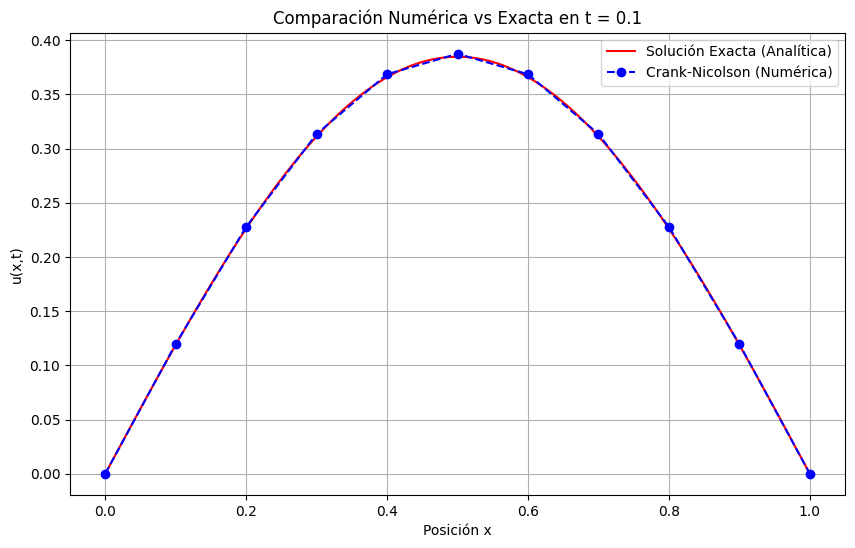

Análisis de error en t=0.1:
Error máximo absoluto: 0.002794
     x    Numérico    Exacto (Tabla 2.7)    Diferencia
------  ----------  --------------------  ------------
0.1000      0.1197                0.1189        0.0009
0.2000      0.2277                0.2261        0.0017
0.3000      0.3135                0.3112        0.0023
0.4000      0.3685                0.3658        0.0027
0.5000      0.3875                0.3847        0.0028
0.6000      0.3685                0.3658        0.0027
0.7000      0.3135                0.3112        0.0023
0.8000      0.2277                0.2261        0.0017
0.9000      0.1197                0.1189        0.0009


In [26]:
# Celda 7: Ejercicio 2 - Solución Exacta y Gráfica
def u_exacta(x, t, n_terms=50):
    """
    Calcula la solución analítica usando series de Fourier.
    Solo términos impares n=1,3,5... debido a la simetría.
    """
    suma = 0
    for n in range(1, n_terms * 2, 2): # n impar
        # Coeficiente de Fourier para la parábola dada
        An = (32 / (np.pi * n)**3) * np.sin(n * np.pi / 2)

        # Término temporal y espacial
        suma += An * np.sin(n * np.pi * x) * np.exp(-(n * np.pi)**2 * t)
    return suma

# Preparación de datos para graficar en t = 0.10 (paso final)
tiempo_objetivo = 0.10
indice_t = int(tiempo_objetivo / k) # Debería ser el índice 10

# Datos Numéricos (agregando las fronteras 0 y 1)
y_num = [0.0] + [float(v) for v in resultados[indice_t]] + [0.0]
x_axis = [0.0] + x_nodes + [1.0]

# Datos Exactos (usando más puntos para una curva suave)
x_smooth = np.linspace(0, 1, 100)
y_exact = [u_exacta(val, tiempo_objetivo) for val in x_smooth]
y_exact_nodes = [u_exacta(val, tiempo_objetivo) for val in x_axis] # Para calcular error en nodos

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_exact, 'r-', label='Solución Exacta (Analítica)')
plt.plot(x_axis, y_num, 'bo--', label='Crank-Nicolson (Numérica)')
plt.title(f"Comparación Numérica vs Exacta en t = {tiempo_objetivo}")
plt.xlabel("Posición x")
plt.ylabel("u(x,t)")
plt.legend()
plt.grid(True)
plt.show()

# Cálculo del Error
errores = np.abs(np.array(y_num) - np.array(y_exact_nodes))
max_error = np.max(errores)

print(f"Análisis de error en t={tiempo_objetivo}:")
print(f"Error máximo absoluto: {max_error:.6f}")

# Tabla comparativa en t=0.10
comparacion = []
headers_comp = ["x", "Numérico", "Exacto (Tabla 2.7)", "Diferencia"]
for i, x_val in enumerate(x_axis):
    # Solo mostramos nodos internos y fronteras principales
    if i > 0 and i < len(x_axis)-1:
        # Usamos el valor calculado exacto aquí, que debería coincidir con la Tabla 2.7
        # Nota: En x=0.5 (índice 5 en la lista interna, 6 aquí), el valor de tabla 2.7 es 0.3847
        row = [f"{x_val:.1f}", y_num[i], y_exact_nodes[i], errores[i]]
        comparacion.append(row)

print(tabulate(comparacion, headers=headers_comp, floatfmt=".4f"))